# Double 7's (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (Scale in and out of trades).
    
    'strategy.py' uses adjust_percent() approach
    'scaling_in_out.py' uses lower level pinkfish functions

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
#start = datetime.datetime(2015, 1, 1)
start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
# ************** IMPORT ONLY ONE OF THESE *************
import strategy
# import scaling_in_out as strategy

Run Strategy

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'margin' : 1,
    'period' : 7,
    'max_open_trades' : 4,
    'enable_scale_in' : True,
    'enable_scale_out' : True
}

s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [6]:
s.rlog.head(50)

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1993-11-19,0,46.31,53,entry,LONG,SPY
1,1993-11-22,1,46.03,53,entry,LONG,SPY
2,1993-12-02,2,46.53,55,exit,LONG,SPY
3,1993-12-03,3,46.72,51,exit,LONG,SPY
4,1993-12-14,4,46.53,53,entry,LONG,SPY
5,1993-12-15,5,46.47,52,entry,LONG,SPY
6,1993-12-21,6,46.47,52,entry,LONG,SPY
7,1993-12-22,7,46.78,56,exit,LONG,SPY
8,1993-12-27,8,47.00,56,exit,LONG,SPY
9,1993-12-28,9,47.09,45,exit,LONG,SPY


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
1105,2023-04-26,404.36,2023-05-10,412.85,8.49,212.25,25,34008.36,LONG,SPY
1106,2023-05-16,410.25,2023-05-17,415.23,4.98,129.48,26,34137.84,LONG,SPY
1107,2023-06-23,433.21,2023-06-29,438.11,4.90,122.50,25,34260.34,LONG,SPY
1108,2023-06-26,431.44,2023-06-29,438.11,6.67,6.67,1,34267.01,LONG,SPY
1109,2023-06-26,431.44,2023-06-30,443.28,11.84,284.16,24,34551.17,LONG,SPY


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-07-24,44551.17,44551.17,44551.17,0,44551.17,1.00,-
2023-07-25,44551.17,44551.17,44551.17,0,44551.17,1.00,-
2023-07-26,44551.17,44551.17,44551.17,0,44551.17,1.00,-
2023-07-27,44551.17,44551.17,44551.17,0,44551.17,1.00,-
2023-07-28,44551.17,44551.17,44551.17,0,44551.17,1.00,-


Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, use_adj=False)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

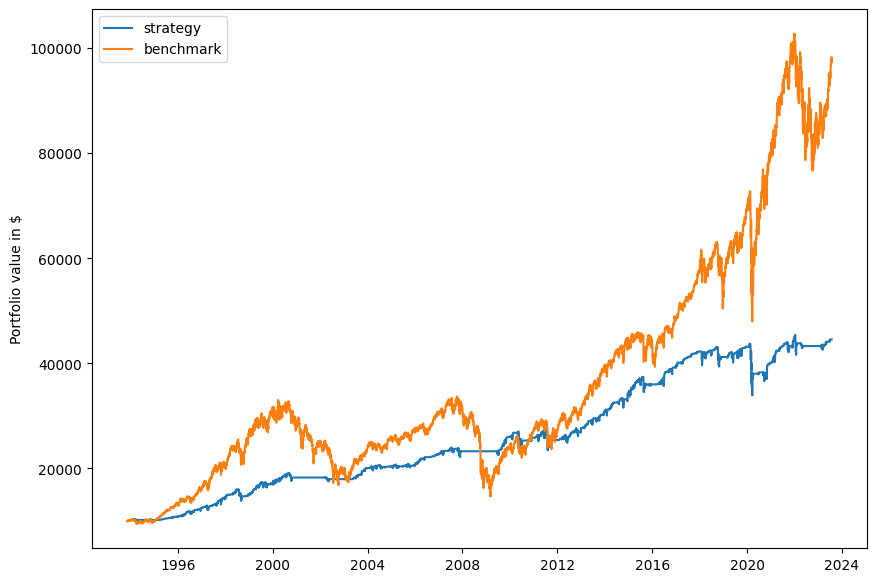

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

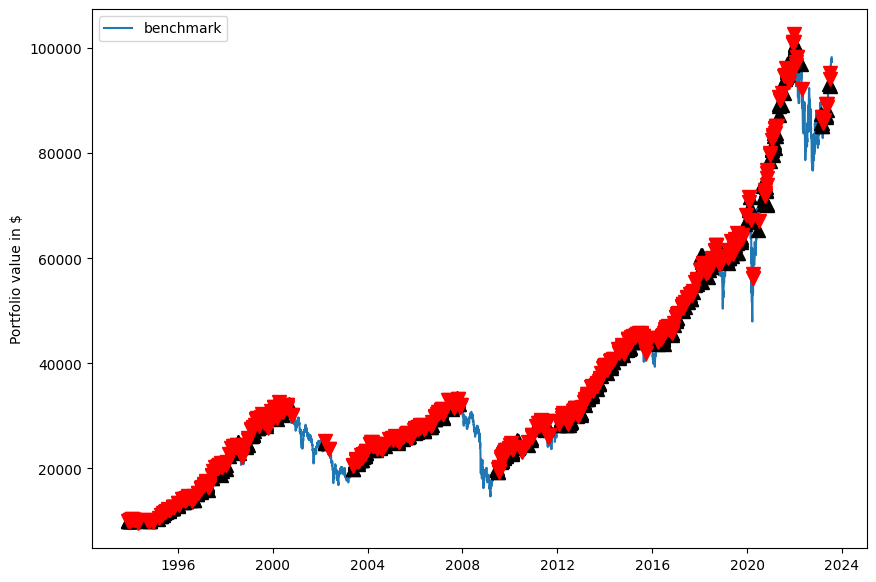

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.16,8.00
max_closed_out_drawdown,-22.44,-56.42
annualized_return_over_max_drawdown,0.23,0.14
best_month,12.17,23.06
worst_month,-21.80,-31.38
sharpe_ratio,0.64,0.50
sortino_ratio,0.48,0.64
monthly_std,1.81,4.54
annual_std,6.37,16.95


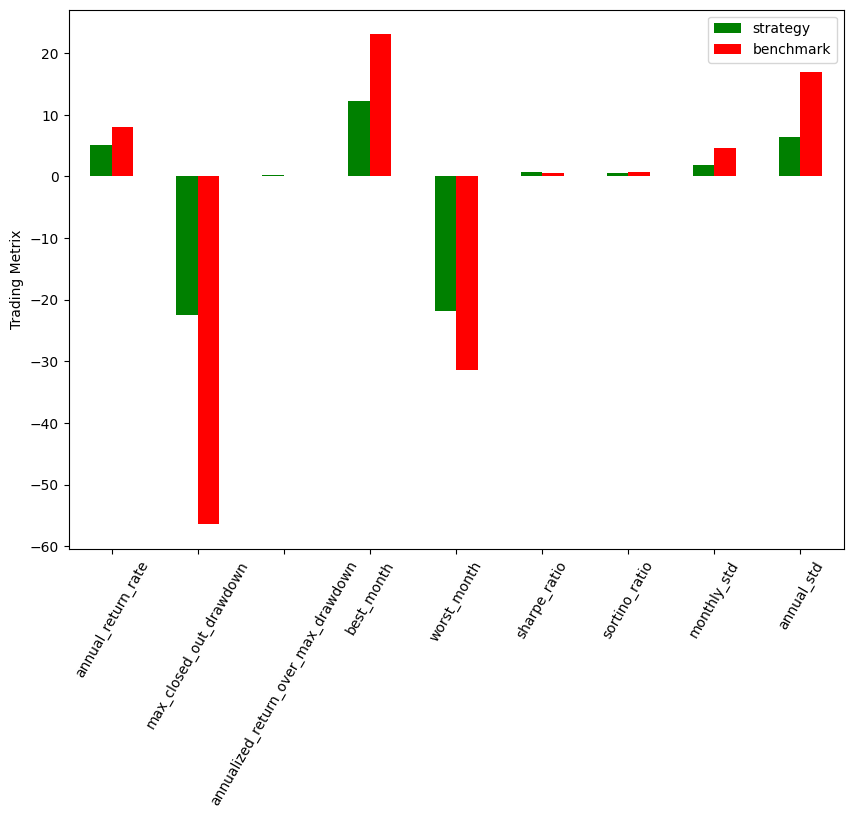

In [12]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.05
median,0.13,0.03
min,0.03,0.00
max,0.96,0.62
std,0.11,0.07
last,0.09,0.01


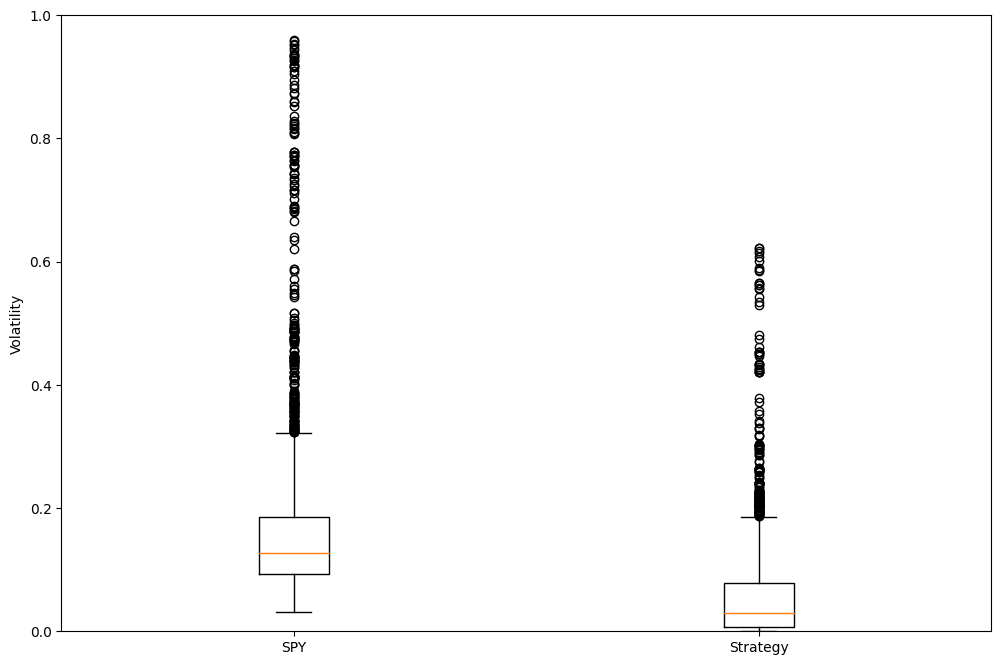

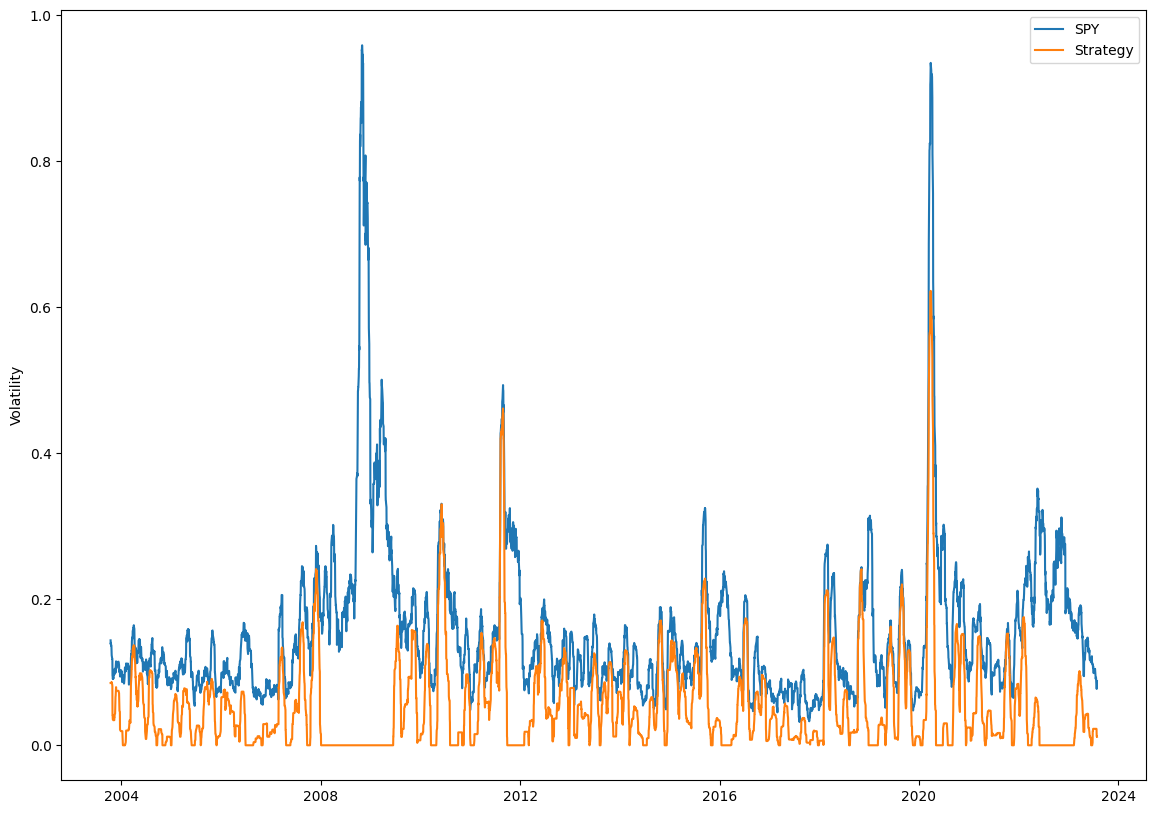

In [13]:
df = pf.volatility_graphs([s.ts, s.dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

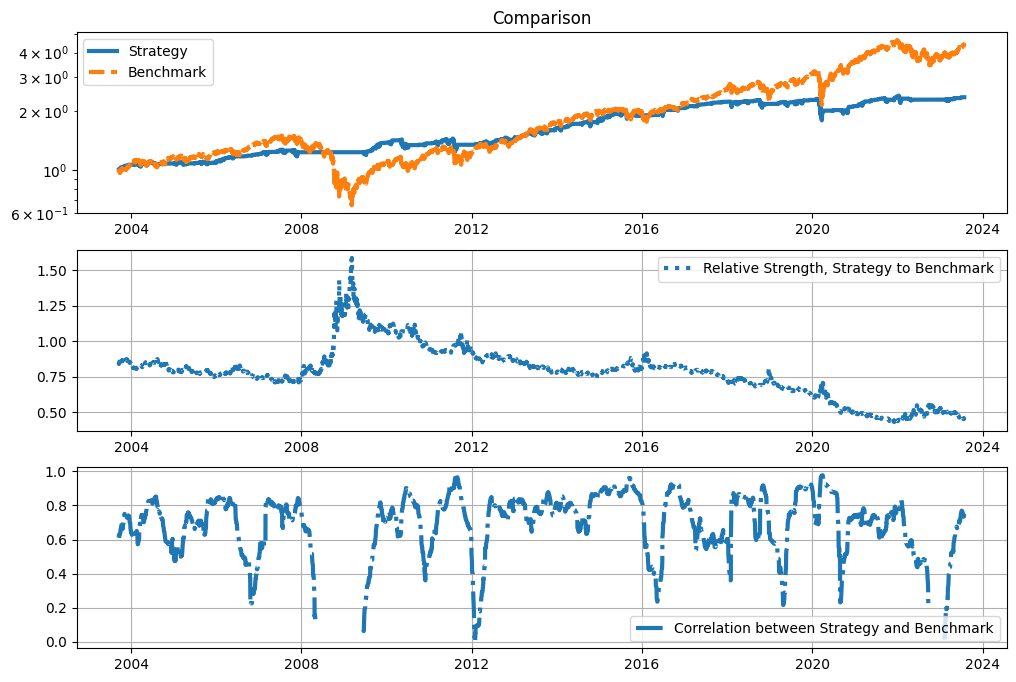

In [14]:
returns = s.dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, dbal_label='Strategy', benchmark_label='Benchmark', points_to_plot=5000)

In [15]:
pf.kelly_criterion(s.stats, benchmark.stats)

sharpe_ratio            0.64
sharpe_ratio_max        0.68
sharpe_ratio_min        0.61
strategy risk           0.06
instrument risk         0.17
optimal target risk     0.64
half kelly criterion    0.32
aggressive leverage     3.80
moderate leverage       1.90
conservative leverage   1.79
dtype: float64